# DSDBAL ASSIGNMENT NO. 4

Data Visualization I

    1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
    
    2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.
The objective is to predict the value of prices of the house using the given features.

## 1. Importing all the required Python Libraries.

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset into pandas’ data frame.

In [126]:
df=pd.read_csv('titanic.csv',index_col="PassengerId")

In [127]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 Dimensions of Dataset

In [128]:
df.shape

(891, 11)

Thus , the Titanic dataset contains total of 891 records and 11 attributes

### 2.2 Variable Description and its types 

In [129]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [130]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [131]:
df.isnull().sum()

# sns.lineplot(data=df)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age and Cabin have null values that we must handle 

## 3.Data Preprocessing

### Handling Numerical Value {Imputing with Mean}

In [132]:
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)

In [133]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Handling Categorical Value {Imputing with Mode}

In [138]:
# mode_cab=df['Cabin'].mode()[0]
# df['Cabin']=df['Cabin'].fillna(mode_cab)

df['Cabin']=df['Cabin'].astype(str).str[0]
# df['Cabin']=df['Cabin'].fillna('U',inplace=True)

# df.drop(columns=['Cabin'],inplace=True)

In [139]:
mode_emb=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mode_emb)

In [140]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [141]:
df.shape

(891, 11)

In [142]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 4. Data Visualisation

### 4.1 Survival Count

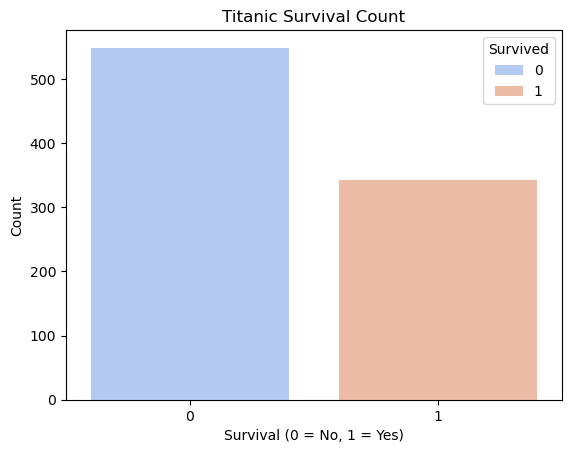

In [143]:
sns.countplot(x="Survived", hue="Survived",  data=df, palette="coolwarm")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Titanic Survival Count")
plt.show()

Observation:

More people did not survive (0) than survived (1).

The Titanic disaster had a low overall survival rate.

Conclusion : 

The Rate of people who survived is Less than those who did

### 4.2 Survival by Gender (Bar Plot)

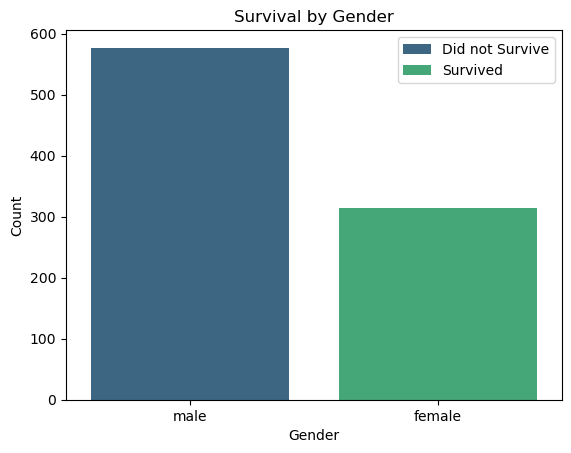

In [144]:
sns.countplot(x="Sex",hue="Sex",data=df,palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival by Gender")
plt.legend(["Did not Survive", "Survived"]) #Legend in form of list 

Observation:

More females survived than males.

The majority of males did not survive.

Conclusion:

Supports the "Women and Children First" policy.

Gender played a significant role in survival chances.


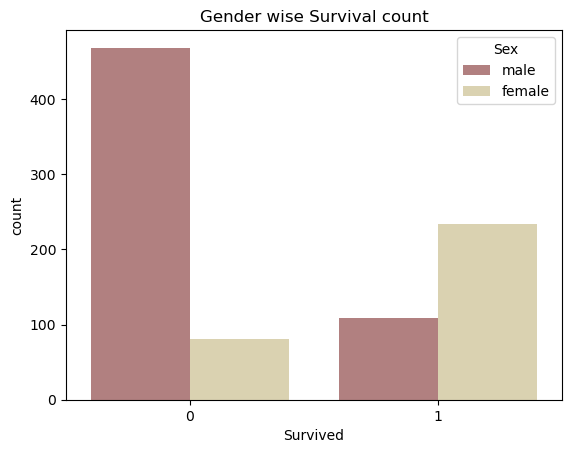

In [170]:
sns.countplot(x="Survived",hue="Sex",data=df,palette="pink")

plt.title("Gender wise Survival count")
plt.show()

### 4.3. Age Distribution (Histogram) 

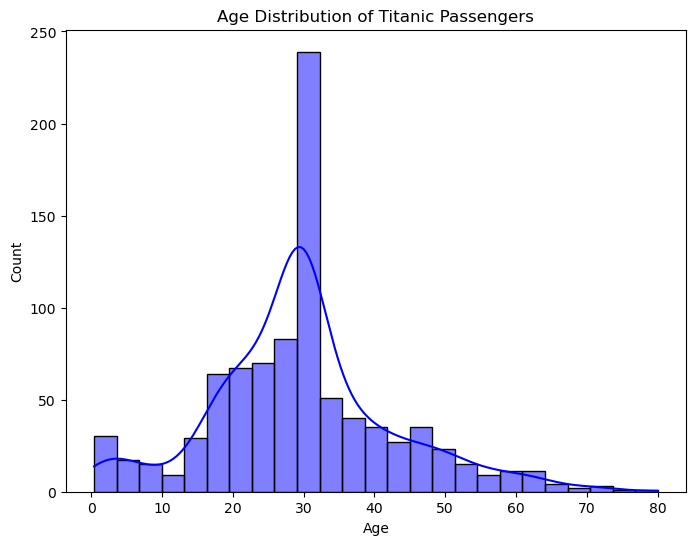

In [145]:
plt.figure(figsize=(8,6))
sns.histplot(df["Age"].dropna(),bins=25,kde=True,color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Titanic Passengers")
plt.show()

# print(df.groupby("Survived")["Age"].min())

Observation:

Most passengers were between 20-40 years old.
    
Fewer very young or very old passengers.

Conclusion:

The Titanic had a high proportion of young adults.
    
This is verified by  below statistics

In [146]:
print(df["Age"].mean().round())

30.0


### 4.4 Class vs. Survival (Stacked Bar Chart)

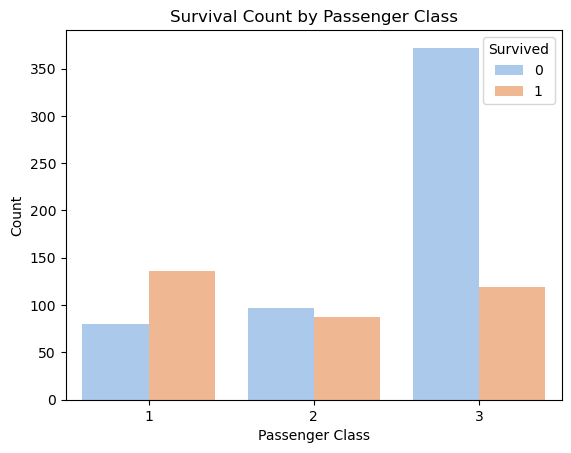

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [147]:
sns.countplot(x="Pclass",hue="Survived",data=df,palette="pastel")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.show()

print(df.groupby("Pclass")["Survived"].mean()*100)

Observation:

1st class passengers survived the most.

3rd class passengers had the highest deaths.

Conclusion:

Higher-class passengers had better survival chances (better access to lifeboats).

3rd class passengers were at a disadvantage, likely due to location on the ship and less access


### 4.5 Fare Distribution (Boxplot)

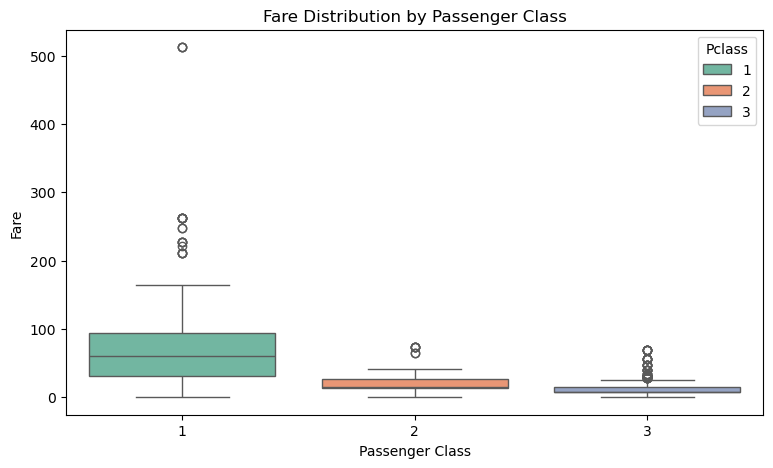

Maximum Fare:  512.3292
Minimum Fare:  0.0
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [148]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Pclass", y="Fare", hue="Pclass", data=df, palette="Set2")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.show()

print("Maximum Fare: ",df['Fare'].max())
print("Minimum Fare: ",df['Fare'].min())
average_fare_per_class = df.groupby("Pclass")["Fare"].mean()
print(average_fare_per_class)

Observation:

1st class tickets were significantly more expensive.

Fare prices varied a lot, with some extreme outliers.

Conclusion:

Fare price is linked to social class, influencing survival.

Some passengers paid very high fares, indicating luxury accommodations.

1st Class: Paid the highest fare (luxury accommodations).

2nd Class: Paid a moderate fare.

3rd Class: Paid the lowest fare (budget travelers).

### 4.6 Age vs. Fare (Scatter Plot)

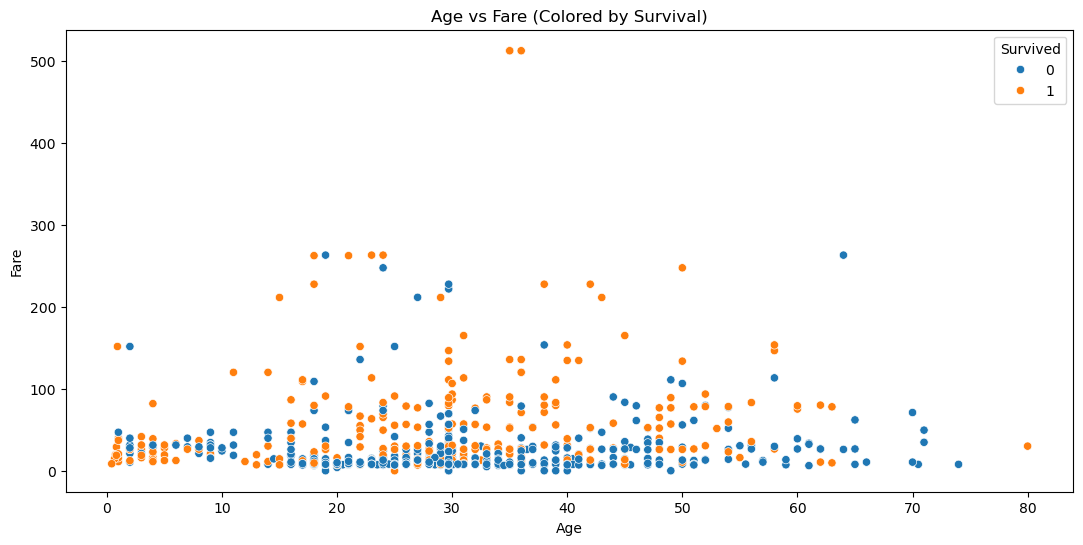

In [149]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

### 4.7  Survival by Embarked Port

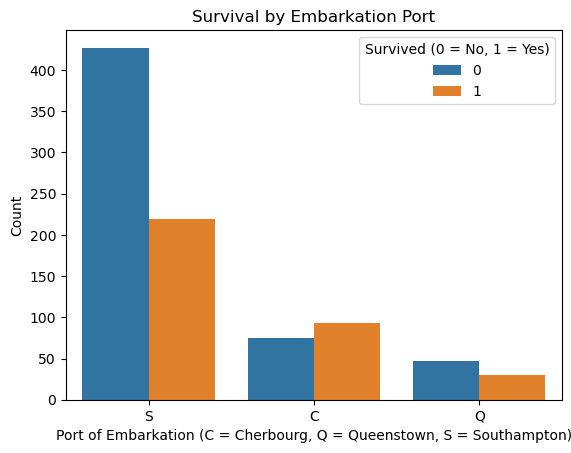

In [156]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Count")
plt.title("Survival by Embarkation Port")
plt.legend(title="Survived (0 = No, 1 = Yes)")
plt.show()


Observation:

Passengers who embarked from Cherbourg (C) had the highest survival rate.

Southampton (S) had the most passengers but the lowest survival rate.


### 4.8 Age Distribution by Survival (Histogram/KDE Plot)

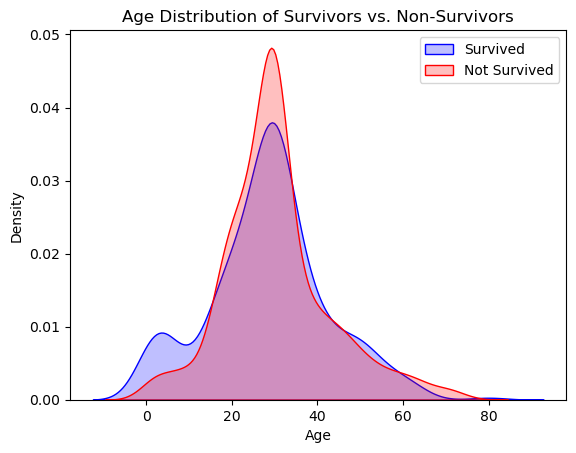

In [158]:
sns.kdeplot(df[df["Survived"] == 1]["Age"], label="Survived", fill=True, color="blue")
sns.kdeplot(df[df["Survived"] == 0]["Age"], label="Not Survived", fill=True, color="red")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.legend()
plt.show()


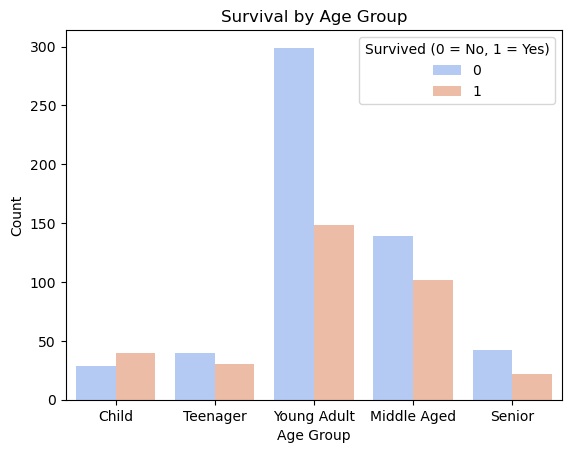

In [160]:
import pandas as pd

# Create age categories
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Middle Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Barplot for survival rate by age group
sns.countplot(x="AgeGroup", hue="Survived", data=df, palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Survival by Age Group")
plt.legend(title="Survived (0 = No, 1 = Yes)")
plt.show()


Observation:

Children (0-12) had a much higher survival rate.
    
Middle-aged and senior passengers had the lowest survival rates.

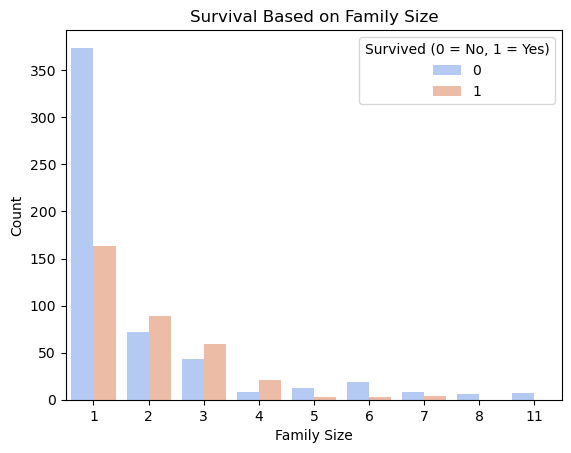

In [161]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # Include self

sns.countplot(x="FamilySize", hue="Survived", data=df, palette="coolwarm")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.title("Survival Based on Family Size")
plt.legend(title="Survived (0 = No, 1 = Yes)")
plt.show()
